In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds
import tensorflow as tf
from sklearn.metrics import accuracy_score,classification_report,f1_score, precision_score, recall_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  


In [13]:
#Load SVHN dataset
train_data, test_data = tfds.load('svhn_cropped', split=['train', 'test'], as_supervised=True)

# Get information about the dataset
num_classes = 10  # SVHN has 10 classes representing digits 0-9
num_train_examples = tf.data.experimental.cardinality(train_data).numpy()
num_test_examples = tf.data.experimental.cardinality(test_data).numpy()

In [14]:
print("Number of classes:", num_classes)
print("Number of training examples:", num_train_examples)
print("Number of test examples:", num_test_examples)


Number of classes: 10
Number of training examples: 73257
Number of test examples: 26032


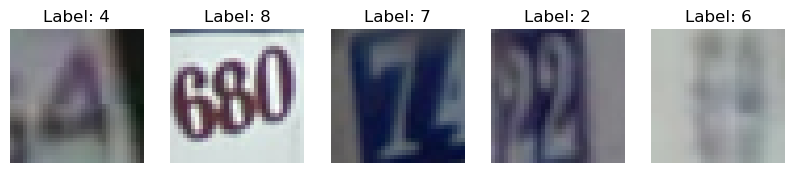

In [15]:
# Display sample images
plt.figure(figsize=(10, 5))
for i, (image, label) in enumerate(train_data.take(5)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image.numpy())
    plt.title(f"Label: {label.numpy()}")
    plt.axis('off')
plt.show()

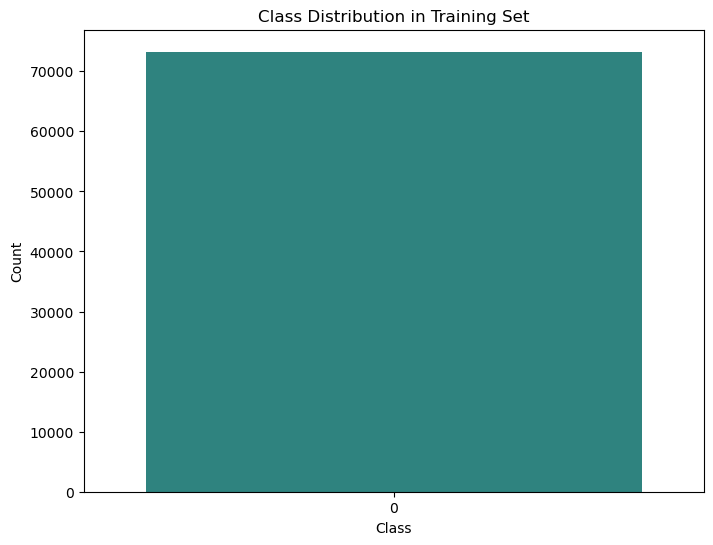

In [16]:
train_labels = np.array([label.numpy() for _, label in train_data])

# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(train_labels, palette='viridis')
plt.title("Class Distribution in Training Set")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [17]:
# Extract features and labels from the dataset
X_train = np.array([image.numpy().reshape(-1) for image, _ in train_data])
y_train = np.array([label.numpy() for _, label in train_data])
X_test = np.array([image.numpy().reshape(-1) for image, _ in test_data])
y_test = np.array([label.numpy() for _, label in test_data])

In [18]:
# Preprocessing: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Now, X_train and y_train contain the original training data
# Let's create a smaller subset for training
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=0.2, random_state=42)

# Instantiate and train the SVM model on the subset
svm_classifier = SVC(C=1.0, kernel='rbf', gamma='scale')
svm_classifier.fit(X_train_subset, y_train_subset)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)


Accuracy on test set: 0.5261397761397761


In [20]:
# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

Precision: 0.6178798686606329


In [21]:
# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

Recall: 0.5261397761397761


In [22]:
# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.56      0.44      0.49       959
           1       0.40      0.92      0.55      2790
           2       0.54      0.66      0.60      2085
           3       0.53      0.46      0.49      1763
           4       0.82      0.53      0.65      1511
           5       0.68      0.29      0.41      1386
           6       0.65      0.38      0.48      1171
           7       0.89      0.38      0.53      1083
           8       0.74      0.25      0.37       983
           9       0.78      0.24      0.37       921

    accuracy                           0.53     14652
   macro avg       0.66      0.46      0.49     14652
weighted avg       0.62      0.53      0.51     14652



In [23]:
# Plot confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mat)

Confusion Matrix:
 [[ 422  288   94   51   15   18   40    3    5   23]
 [  20 2574  107   35   15    9   17   11    1    1]
 [  17  578 1376   53   21   10    4   15    2    9]
 [  25  639  186  811   15   48   12    6   18    3]
 [  34  514   88   30  804    7   22    3    6    3]
 [  28  482  114  278   17  406   36    1   17    7]
 [  59  381   91   69   49   51  444    1   18    8]
 [  14  409  202   24    8    4   11  409    1    1]
 [  51  323  114  114   20   31   77    3  243    7]
 [  90  305  163   69   17   16   15   10   16  220]]


In [24]:
# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


F1 Score: 0.5123112400670546
